In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("deadskull7/fer2013")

print("Path to dataset files:", path)

100%|██████████| 96.6M/96.6M [00:00<00:00, 195MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/deadskull7/fer2013/versions/1


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("noamsegal/affectnet-training-data")

print("Path to dataset files:", path)

100%|██████████| 314M/314M [00:02<00:00, 125MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/noamsegal/affectnet-training-data/versions/3


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shawon10/ckplus")

print("Path to dataset files:", path)

100%|██████████| 3.63M/3.63M [00:00<00:00, 145MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shawon10/ckplus/versions/1


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")

print("Path to dataset files:", path)

100%|██████████| 429M/429M [00:05<00:00, 81.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ejlok1/cremad")

print("Path to dataset files:", path)

100%|██████████| 451M/451M [00:04<00:00, 117MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ejlok1/cremad/versions/1


In [8]:
import kagglehub
import pandas as pd
import numpy as np
import tensorflow as tf
import os

# Download the latest version of the dataset
path = kagglehub.dataset_download("deadskull7/fer2013")

# Locate the CSV file
csv_path = os.path.join(path, "fer2013.csv")

# Load dataset
data = pd.read_csv(csv_path)

# Convert pixels column to numpy arrays
def process_images(images):
    return np.array([np.array(img.split(), dtype=np.uint8).reshape(48, 48, 1) for img in images]) / 255.0

# Preprocess images and labels
X_train = process_images(data[data["Usage"] == "Training"]["pixels"])
X_test = process_images(data[data["Usage"] == "PublicTest"]["pixels"])

y_train = tf.keras.utils.to_categorical(data[data["Usage"] == "Training"]["emotion"], num_classes=7)
y_test = tf.keras.utils.to_categorical(data[data["Usage"] == "PublicTest"]["emotion"], num_classes=7)

print("Dataset loaded successfully!")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Dataset loaded successfully!
Training samples: 28709, Testing samples: 3589


In [9]:
import kagglehub
import pandas as pd
import numpy as np
import tensorflow as tf

# Download the dataset using kagglehub
path = kagglehub.dataset_download("deadskull7/fer2013")

# Load dataset
csv_path = f"{path}/fer2013.csv"
data = pd.read_csv(csv_path)

# Convert pixels column to numpy arrays
def process_images(images):
    return np.array([np.array(img.split(), dtype=np.uint8).reshape(48, 48, 1) for img in images]) / 255.0

X_train = process_images(data[data["Usage"] == "Training"]["pixels"])
X_test = process_images(data[data["Usage"] == "PublicTest"]["pixels"])
y_train = tf.keras.utils.to_categorical(data[data["Usage"] == "Training"]["emotion"], num_classes=7)
y_test = tf.keras.utils.to_categorical(data[data["Usage"] == "PublicTest"]["emotion"], num_classes=7)

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotions
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

print("Dataset successfully loaded and processed!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,420,295 (5.42 MB)

 Trainable params: 1,420,295 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

Dataset successfully loaded and processed!


In [10]:
model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 287s 634ms/step - accuracy: 0.2554 - loss: 1.8145 - val_accuracy: 0.4157 - val_loss: 1.5667
Epoch 2/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 282s 629ms/step - accuracy: 0.4035 - loss: 1.5345 - val_accuracy: 0.4787 - val_loss: 1.3479
Epoch 3/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 329s 644ms/step - accuracy: 0.4781 - loss: 1.3634 - val_accuracy: 0.5208 - val_loss: 1.2736


In [11]:
import librosa
import librosa.display
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [14]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load trained emotion detection model
model = load_model("emotion_model.h5")

# Load OpenCV's pre-trained face detection model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Emotion labels
emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

def predict_emotion(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (48, 48)) / 255.0  # Normalize pixel values
        face = np.expand_dims(face, axis=0).reshape(1, 48, 48, 1)

        prediction = model.predict(face)
        emotion_idx = np.argmax(prediction)
        emotion_label = emotions[emotion_idx]

        return emotion_label, (x, y, w, h)  # Return emotion with face coordinates

    return None, None  # If no face detected

# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    emotion, face_coords = predict_emotion(frame)

    if face_coords:
        x, y, w, h = face_coords
        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # Display the predicted emotion
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow("Emotion Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'emotion_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [16]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [17]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions


In [18]:
!kaggle datasets list


ref                                                       title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                  Car Price Dataset                             135KB  2025-01-26 19:53:28          18680        302  1.0              
asinow/diabetes-dataset                                   Diabetes Dataset                              224KB  2025-02-20 08:38:56           1075         25  1.0              
mahmoudelhemaly/students-grading-dataset                  Student Performance & Behavior Dataset        508KB  2025-02-17 17:38:46           2500         43  1.0              
abdulmalik1518/mobiles-dataset-2025                       Mobiles Dataset (2025)                         20KB  2025-02-1

In [19]:
!kaggle datasets download -d deadskull7/fer2013
!unzip fer2013.zip -d fer2013_data


Dataset URL: https://www.kaggle.com/datasets/deadskull7/fer2013
License(s): CC0-1.0
 87% 84.0M/96.6M [00:00<00:00, 232MB/s]
100% 96.6M/96.6M [00:00<00:00, 220MB/s]
Archive:  fer2013.zip
  inflating: fer2013_data/fer2013.csv  


In [20]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [21]:
# Load the dataset
data = pd.read_csv("fer2013_data/fer2013.csv")

# Function to process image pixels
def process_images(images):
    return np.array([np.array(img.split(), dtype=np.uint8).reshape(48, 48, 1) for img in images]) / 255.0  # Normalize

# Convert dataset pixels to NumPy arrays
X = process_images(data["pixels"])
y = to_categorical(data["emotion"], num_classes=7)  # Convert labels to one-hot encoding

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print data shapes
print(f"Training Data Shape: {X_train.shape}, Labels Shape: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, Labels Shape: {y_test.shape}")


Training Data Shape: (28709, 48, 48, 1), Labels Shape: (28709, 7)
Testing Data Shape: (7178, 48, 48, 1), Labels Shape: (7178, 7)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a simple CNN model
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,277,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,353,351 (12.79 MB)

 Trainable params: 3,353,351 (12.79 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)


Epoch 1/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 247s 546ms/step - accuracy: 0.2778 - loss: 1.7584 - val_accuracy: 0.4273 - val_loss: 1.4982
Epoch 2/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 237s 527ms/step - accuracy: 0.4327 - loss: 1.4738 - val_accuracy: 0.4691 - val_loss: 1.3892
Epoch 3/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 269s 544ms/step - accuracy: 0.4767 - loss: 1.3759 - val_accuracy: 0.4955 - val_loss: 1.3198


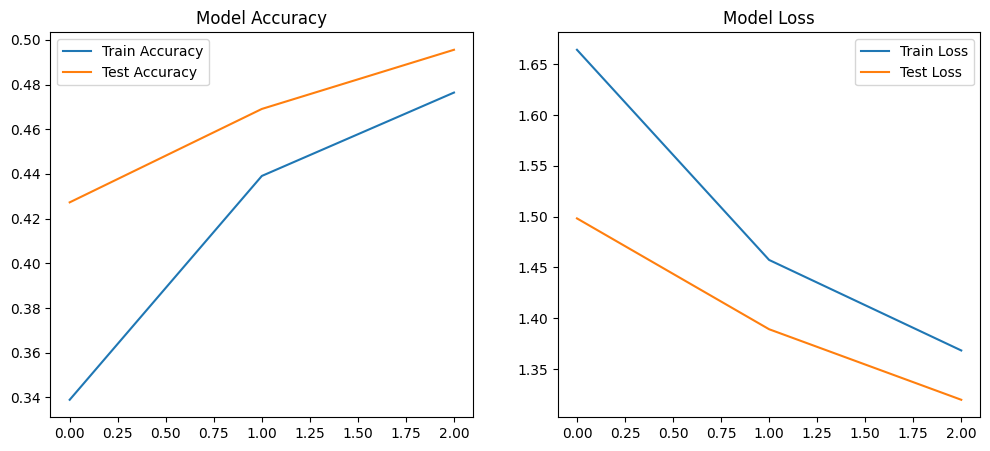

In [24]:
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title("Model Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


In [25]:
# Save the trained model
model.save("emotion_model.h5")
print("Model saved as emotion_model.h5!")

# Load the model (for later use)
from tensorflow.keras.models import load_model
model = load_model("emotion_model.h5")
print("Model loaded successfully!")


Model saved as emotion_model.h5!
Model loaded successfully!


In [26]:
model.save("emotion_model.h5")
print("Model saved successfully as emotion_model.h5!")


Model saved successfully as emotion_model.h5!


In [27]:
import os
print("Saved models:", os.listdir())


Saved models: ['.config', 'fer2013_data', 'emotion_model.h5', 'drive', 'fer2013.zip', 'sample_data']


In [28]:
from google.colab import files
files.download("emotion_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
!pip install opencv-python

In [30]:
import urllib.request

haar_url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml"
urllib.request.urlretrieve(haar_url, "haarcascade_frontalface_default.xml")
print("Haarcascade file downloaded!")


Haarcascade file downloaded!


In [33]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("emotion_model.h5")

# Load Haarcascade for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Emotion labels (based on FER2013 dataset)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Initialize webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale (needed for Haarcascade)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract face ROI
        face = gray[y:y+h, x:x+w]

        # Preprocess the face (resize, normalize, reshape)
        face = cv2.resize(face, (48, 48)) / 255.0
        face = np.expand_dims(face, axis=0).reshape(1, 48, 48, 1)

        # Predict emotion
        prediction = model.predict(face)
        emotion_index = np.argmax(prediction)
        emotion = emotion_labels[emotion_index]

        # Draw rectangle around face and put text
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Show video feed
    cv2.imshow("Emotion Detection", frame)

    # Exit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


In [32]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("emotion_model.h5")

# Recompile the model to include metrics
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

print("Model loaded and compiled successfully!")


Model loaded and compiled successfully!


In [37]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("emotion_model.h5")

# Load Haarcascade for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Capture webcam video using JavaScript in Colab
def capture_video():
    display(Javascript('''
        async function startCapture() {
            const video = document.createElement('video');
            video.style.display = 'none';
            document.body.appendChild(video);
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });
            video.srcObject = stream;
            await video.play();
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            while (true) {
                const canvas = document.createElement('canvas');
                canvas.width = video.videoWidth;
                canvas.height = video.videoHeight;
                canvas.getContext('2d').drawImage(video, 0, 0);
                const imageData = canvas.toDataURL('image/jpeg', 0.8);
                google.colab.kernel.invokeFunction('notebook.capture_frame', [imageData], {});
                await new Promise(resolve => setTimeout(resolve, 100));
            }
        }
        startCapture();
    '''))

# Decode image from JavaScript
def decode_image(image_data):
    header, encoded = image_data.split(',', 1)
    image_bytes = b64decode(encoded)
    image_array = np.frombuffer(image_bytes, dtype=np.uint8)
    return cv2.imdecode(image_array, cv2.IMREAD_COLOR)


def capture_frame(image_data):
    frame = decode_image(image_data)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (48, 48)) / 255.0
        face = np.expand_dims(face, axis=0).reshape(1, 48, 48, 1)

        prediction = model.predict(face)
        emotion_index = np.argmax(prediction)
        emotion = emotion_labels[emotion_index]

        # Draw rectangle & label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Display the frame using Matplotlib
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

        print(f"Predicted Emotion: {emotion}")

# Start video capture
capture_video()


<IPython.core.display.Javascript object>

In [57]:
from google.colab import output
from IPython.display import Javascript

def record_video(filename="video.mp4", duration=5):
    js = Javascript(f"""
        async function recordVideo() {{
            const stream = await navigator.mediaDevices.getUserMedia({{ video: true, audio: false }});
            const recorder = new MediaRecorder(stream);
            let chunks = [];

            recorder.ondataavailable = (event) => {{
                if (event.data.size > 0) {{
                    chunks.push(event.data);
                }}
            }};

            recorder.start();

            await new Promise(resolve => setTimeout(resolve, {duration * 1000}));

            recorder.stop();

            await new Promise(resolve => recorder.onstop = resolve);

            let blob = new Blob(chunks, {{ type: "video/mp4" }});
            let url = URL.createObjectURL(blob);
            let a = document.createElement("a");
            a.href = url;
            a.download = "{filename}";
            a.click();
        }}

        recordVideo();
    """)

    display(js)

# Call the function to record a 10-second video
record_video()


<IPython.core.display.Javascript object>

In [58]:
from google.colab import files
uploaded = files.upload()


Saving video (6).mp4 to video (6).mp4


In [59]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("emotion_model.h5")

# Load Haarcascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Open the uploaded video
video_path = "video (6).mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (48, 48)) / 255.0
        face = np.expand_dims(face, axis=0).reshape(1, 48, 48, 1)

        prediction = model.predict(face)
        emotion_index = np.argmax(prediction)
        emotion = emotion_labels[emotion_index]

        # Draw rectangle & label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Display frame using Matplotlib
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

    frame_count += 1
    if frame_count > 20:  # Limit frame display to avoid slow execution
        break

cap.release()
print("Video processing completed!")


Output hidden; open in https://colab.research.google.com to view.